In [1]:
#importing Libraries
import pandas as pd #used for data manipulation
import numpy as np #used for numerical analysis
from collections import Counter as c #returns counts of number of classes
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns #data visualization library
import missingno as msno #finding missing values
from sklearn.metrics import accuracy_score,confusion_matrix #model performance
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.preprocessing import LabelEncoder #encoding the levels of categorical features
from sklearn.linear_model import LogisticRegression#classification of algorithms
import pickle #python object hierarchy is converted into a byr stream

In [3]:
#Read the Dataset
data=pd.read_csv("/content/chronic_kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.drop(["id"],axis=1,inplace=True)

In [5]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
#Data preparation
#Rename The Columns

data.columns=['age','blood_pressure','specific_gravity','albumin','sugar',
              'red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood glucose random',
              'blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume',
              'white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus',
              'coronary_artery_disease','appetite','pedal_edema','anemia','class']

data.columns         

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [8]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [9]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [11]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [12]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('float64'), dtype('O')], dtype=object), array([11, 14]))

In [13]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'red_blood_cells', 'packed_cell_volume', 'red_blood_cell_count', 'appetite', 'pus_cell', 'anemia', 'class', 'white_blood_cell_count', 'hypertension', 'coronary_artery_disease', 'diabetesmellitus', 'pedal_edema', 'pus_cell_clumps', 'bacteria'}


In [14]:
for i in catcols:
  print("columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

columns: red_blood_cells
Counter({'normal': 201, nan: 152, 'abnormal': 47})
************************************************************************************************************************

columns: packed_cell_volume
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '23': 2, '19': 2, '16': 1, '\t?': 1, '14': 1, '18': 1, '17': 1, '15': 1, '21': 1, '20': 1, '\t43': 1, '9': 1})
************************************************************************************************************************

columns: red_blood_cell_count
Counter({nan: 130, '5.2': 18, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3'

In [15]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'red_blood_cells', 'appetite', 'pus_cell', 'anemia', 'class', 'hypertension', 'coronary_artery_disease', 'diabetesmellitus', 'pedal_edema', 'pus_cell_clumps', 'bacteria'}


In [16]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'hemoglobin', 'sugar', 'blood_urea', 'albumin', 'serum_creatinine', 'blood_pressure', 'potassium', 'specific_gravity', 'age', 'blood glucose random', 'sodium'}


In [17]:
for i in contcols:
  print("Continous Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')


Continous Columns: hemoglobin
Counter({15.0: 16, 10.9: 8, 9.8: 7, 11.1: 7, 13.0: 7, 13.6: 7, 11.3: 6, 10.3: 6, 12.0: 6, 13.9: 6, 15.4: 5, 11.2: 5, 10.8: 5, 9.7: 5, 12.6: 5, 7.9: 5, 10.0: 5, 14.0: 5, 14.3: 5, 14.8: 5, 12.2: 4, 12.4: 4, 12.5: 4, 15.2: 4, 9.1: 4, 11.9: 4, 13.5: 4, 16.1: 4, 14.1: 4, 13.2: 4, 13.8: 4, 13.7: 4, 13.4: 4, 17.0: 4, 15.5: 4, 15.8: 4, 9.6: 3, 11.6: 3, 9.5: 3, 9.4: 3, 12.7: 3, 9.9: 3, 10.1: 3, 8.6: 3, 11.0: 3, 15.6: 3, 8.1: 3, 8.3: 3, 10.4: 3, 11.8: 3, 11.4: 3, 11.5: 3, 15.9: 3, 14.5: 3, 16.2: 3, 14.4: 3, 14.2: 3, 16.3: 3, 16.5: 3, 15.7: 3, 16.4: 3, 14.9: 3, 15.3: 3, 17.8: 3, 12.1: 2, 9.3: 2, 10.2: 2, 10.5: 2, 6.0: 2, 11.7: 2, 8.0: 2, 12.3: 2, 8.7: 2, 13.1: 2, 8.8: 2, 13.3: 2, 14.6: 2, 16.9: 2, 16.0: 2, 14.7: 2, 16.6: 2, 16.7: 2, 16.8: 2, 15.1: 2, 17.1: 2, 17.2: 2, 17.4: 2, 5.6: 1, 7.6: 1, 7.7: 1, nan: 1, nan: 1, 12.9: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.6: 1, nan: 1, nan: 1, 7.5: 1, nan: 1, nan: 1, 4.8: 1, nan: 1, nan: 1, 7.1: 1, nan: 1, nan: 1, nan: 1, 9.2: 1, 

In [18]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'hemoglobin', 'blood_urea', 'serum_creatinine', 'blood_pressure', 'potassium', 'age', 'blood glucose random', 'sodium'}


In [19]:
contcols.add('red_blood_cell_count')
contcols.add('white_blood_cell_count')
contcols.add('packed_cell_volume')
print(contcols)

{'hemoglobin', 'red_blood_cell_count', 'packed_cell_volume', 'blood_urea', 'serum_creatinine', 'white_blood_cell_count', 'blood_pressure', 'potassium', 'age', 'blood glucose random', 'sodium'}


In [20]:
# adding the categorical columns

contcols.add('specific_gravity')
contcols.add('albumin')
contcols.add('sugar')
print(catcols)

{'red_blood_cells', 'appetite', 'pus_cell', 'anemia', 'class', 'hypertension', 'coronary_artery_disease', 'diabetesmellitus', 'pedal_edema', 'pus_cell_clumps', 'bacteria'}


In [21]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [22]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 136, 'no': 261, ' yes': 1, nan: 2})

In [23]:
#converting the columns into numeric type

data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume,errors='coerce')
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count,errors='coerce')
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count,errors='coerce')

In [24]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [25]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood glucose random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [26]:
#Label Encoding of Categorical column
catcols=['hypertension', 'anemia', 'red_blood_cells', 'bacteria', 'pus_cell', 'diabetesmellitus', 
         'appetite', 'coronary_artery_disease', 'pus_cell_clumps', 'pedal_edema', 'class']

In [27]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi=LabelEncoder()
  print(c(data[i]))
  data[i]=LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF: hypertension
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
****************************************************************************************************
LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: red_blood_cells
Counter({'normal': 353, 'abnormal': 47})
Counter({1: 353, 0: 47})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: pus_cell
Counter({'normal': 324, 'abnormal': 76})
Counter({1: 324, 0: 76})
****************************************************************************************************
LABEL ENCODING OF: diabetesme

<ipython-input-28-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

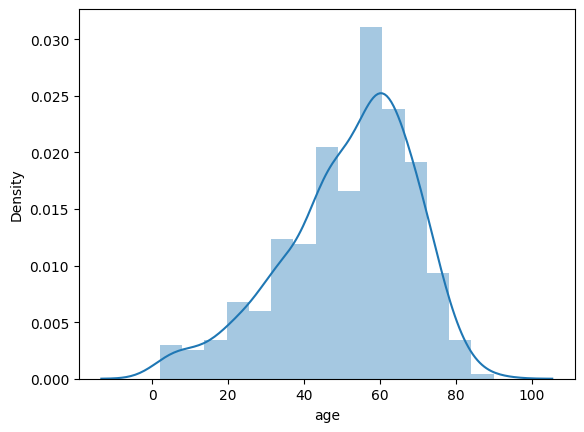

In [28]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age vs blood pressure scatter plot')

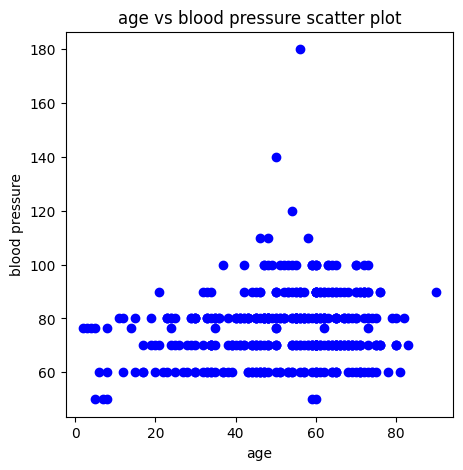

In [29]:
#Data Visualization
#Age VS Blood pressure

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("age vs blood pressure scatter plot")

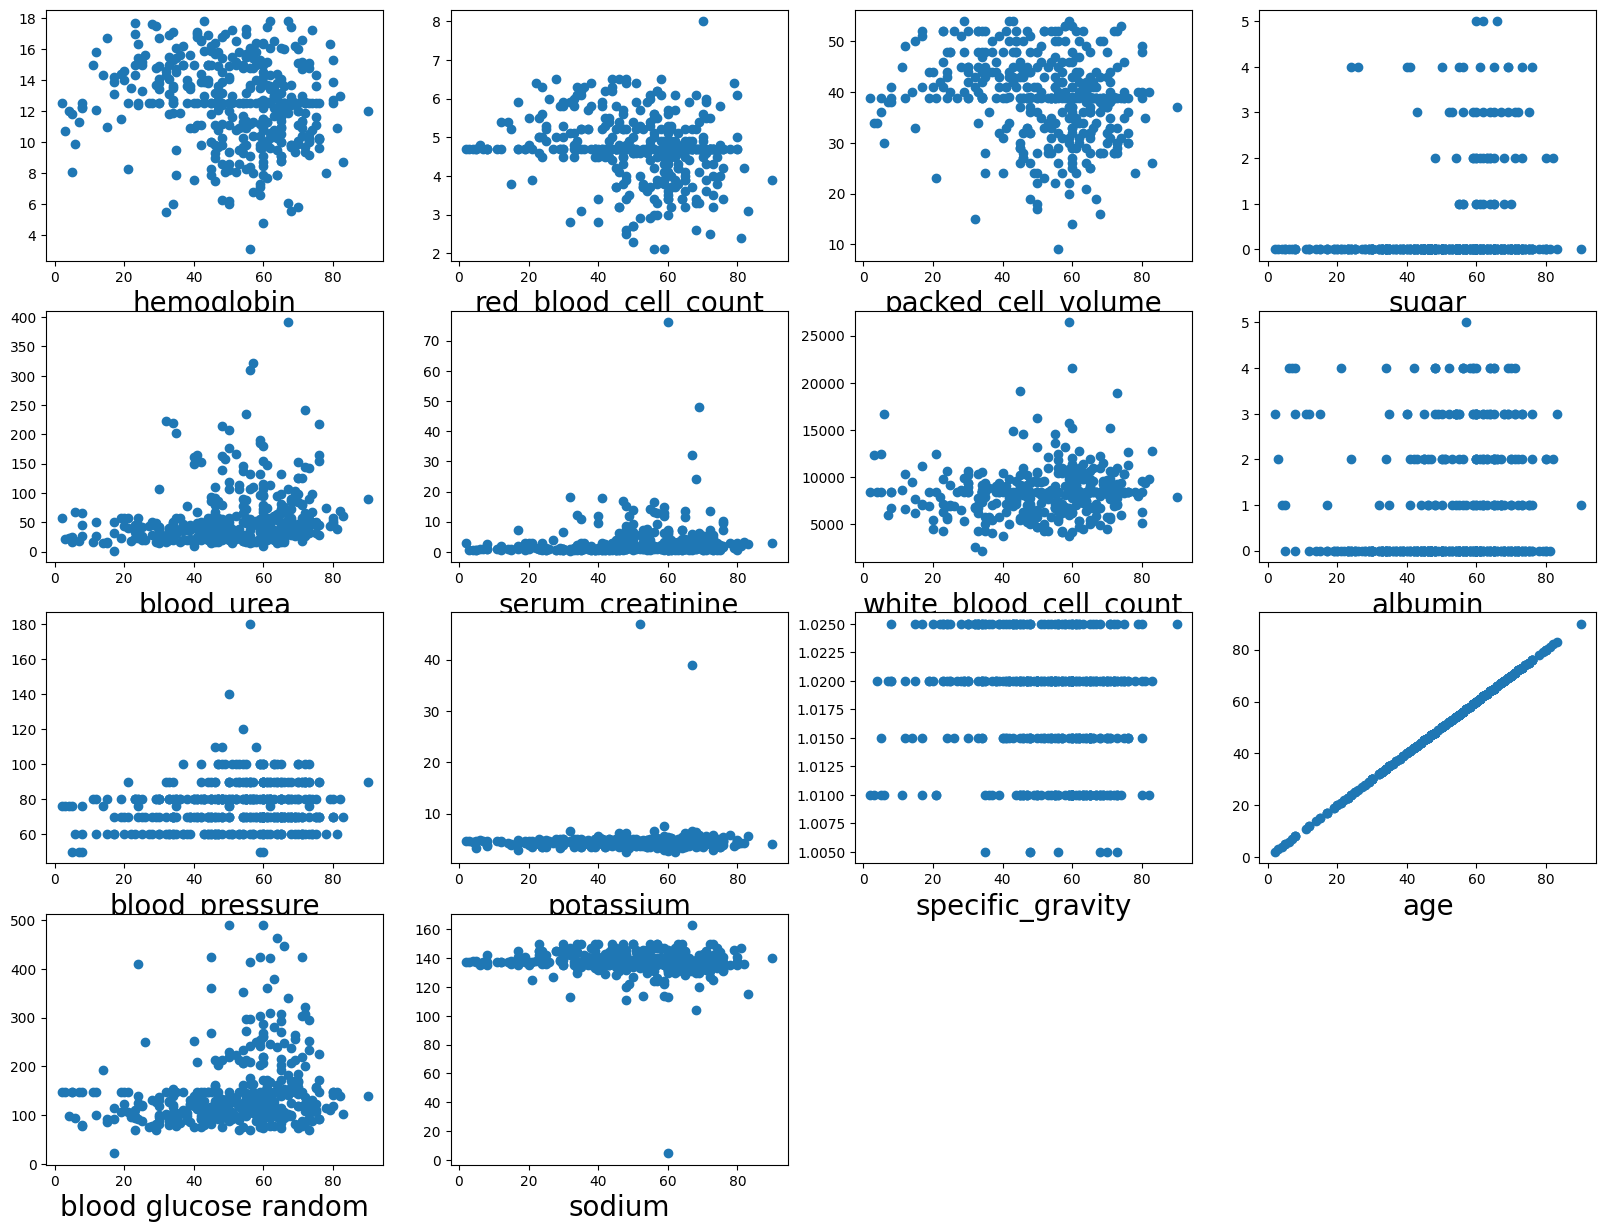

In [30]:
#Age VS All continuous columns

plt.figure(figsize=(20,15),facecolor='white')
plotnumber = 1

for column in contcols:
  if plotnumber<=14 :
    ax=plt.subplot(4,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()    

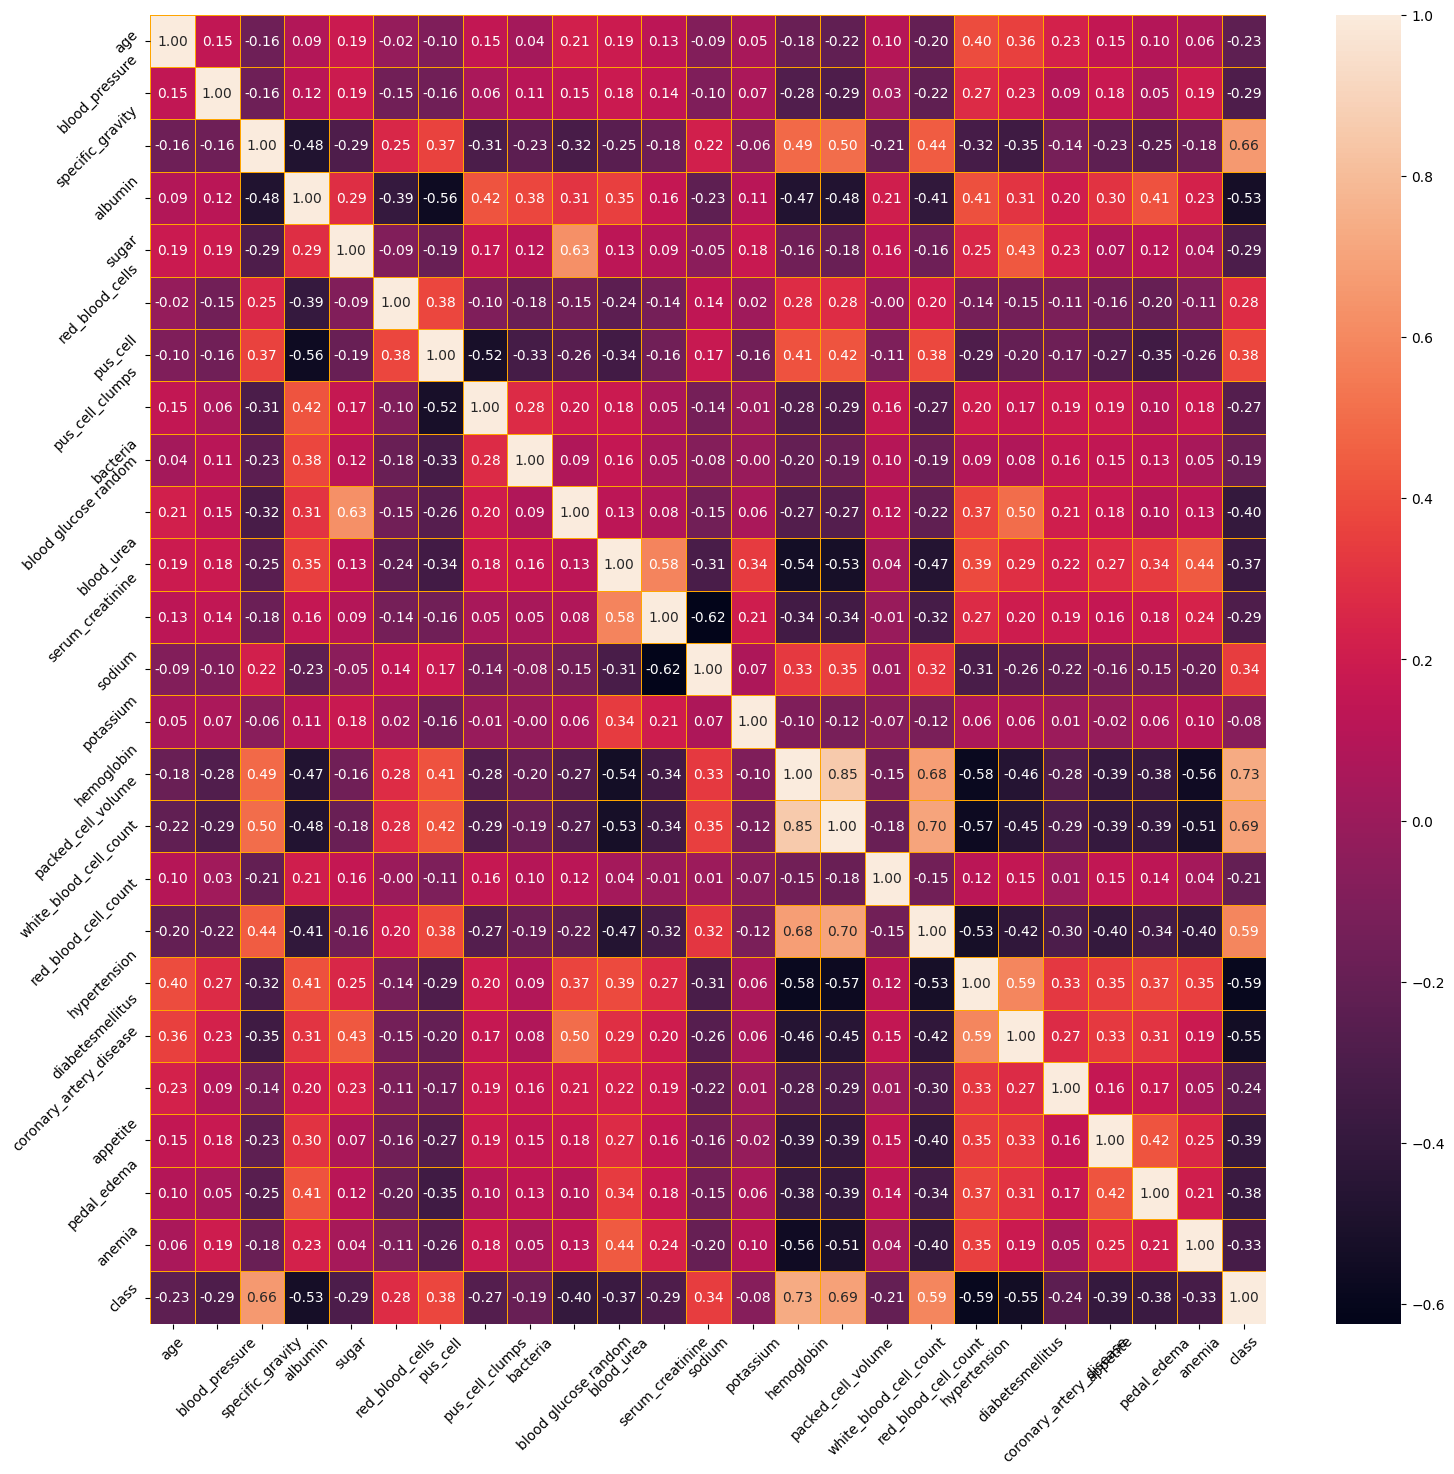

In [31]:
#Finding correlation between independent columns

f,ax=plt.subplots(figsize=(18,17))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [32]:
data['class'].unique()

array([0, 1])

<Axes: ylabel='count'>

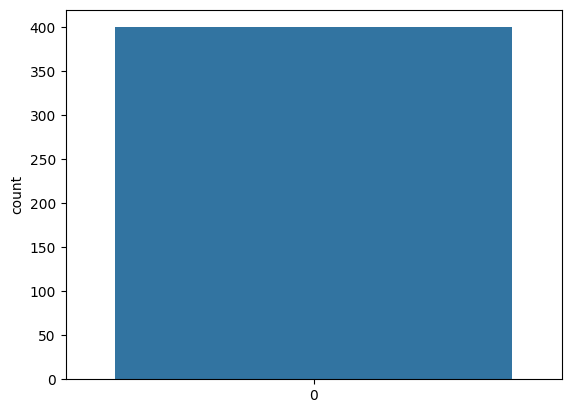

In [33]:
sns.countplot(data['class'])

In [34]:
#creating indepentent and dependent

selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea',
         'pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [35]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(280, 8)
(280, 1)
(120, 8)
(120, 1)


In [36]:
# Model Building
#TRain the model in multiple algorithms

#ANN Model
import tensorflow
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense



In [37]:
#creating ANN skleton View

classification= Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [38]:
#compiling the ANN model
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
#training the model
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
23/23 [==============================] - 2s 9ms/step - loss: 0.9125 - accuracy: 0.5580 - val_loss: 0.6803 - val_accuracy: 0.6607
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.5759 - val_loss: 0.5487 - val_accuracy: 0.6607
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.6027 - val_loss: 0.5366 - val_accuracy: 0.7143
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.5714 - val_loss: 0.5212 - val_accuracy: 0.6964
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.6473 - val_loss: 0.5250 - val_accuracy: 0.6786
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5982 - val_loss: 0.5212 - val_accuracy: 0.6607
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.6295 - val_loss: 0.6512 - val_accuracy: 0.6607
Epoch 8/100
2

In [40]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [41]:
rfc.fit(x_train,y_train)

<ipython-input-41-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [42]:
y_predict=rfc.predict(x_test)

In [43]:
y_predict_train=rfc.predict(x_train)

In [44]:
#Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')


In [45]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
y_predict=dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [47]:
y_predict_train=dtc.predict(x_train)

In [48]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [49]:
#predicting our output  with model which we build

In [50]:

#logistic Regression 
from sklearn.metrics import accuracy_score, classification_report
y_predict= lgr.predict([[129,99,1,0,0,1,0,1]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
print(y_predict)
c(y_predict)

[1]


Counter({1: 1})

In [52]:

y_predict=lgr.predict(x_test)
accuracy_score(y_test,y_predict)

0.9

In [53]:
#testing the model


#Random forest classifier

y_predict=rfc.predict([[1,1,121,000,36.,0,0,1]])

print(y_predict)
y_predict


[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [54]:
#Decision tree classifier

y_predict=dtc.predict([[1,1,121,000,36.,0,0,1]])

print(y_predict)
y_predict

[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [55]:
y_predict=lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_predict)
y_predict

[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [56]:
classification.save("ckd.h5")

In [57]:
y_predict = classification.predict(x_test)

y_predict


4/4 [==============================] - 0s 2ms/step


array([[1.0008919e-03],
       [2.9427707e-02],
       [2.5963090e-10],
       [9.1551123e-03],
       [7.9761815e-01],
       [4.7365866e-06],
       [2.6207253e-08],
       [4.4834405e-07],
       [5.4398024e-01],
       [7.6936358e-06],
       [4.9709044e-33],
       [6.7185098e-04],
       [3.6107621e-01],
       [3.9200738e-01],
       [3.3040407e-27],
       [6.0049032e-14],
       [0.0000000e+00],
       [5.9966922e-01],
       [5.0358713e-01],
       [9.6401171e-09],
       [8.3113563e-01],
       [4.1347301e-01],
       [0.0000000e+00],
       [3.6476058e-01],
       [3.8444514e-06],
       [6.5729296e-01],
       [7.7306173e-23],
       [5.3621135e-10],
       [9.0010256e-01],
       [1.0591455e-04],
       [6.2898434e-05],
       [6.1352485e-01],
       [6.2051141e-03],
       [3.4240885e-03],
       [4.5251403e-09],
       [4.1257488e-04],
       [8.1279647e-01],
       [5.2320212e-04],
       [3.2894945e-01],
       [8.8876206e-01],
       [4.9833343e-05],
       [2.704032

In [58]:
y_predict = (y_predict > 0.5)
y_predict
    


array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [

In [59]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1,-1)
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_value)



test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
     print('prediction: High chance of CKD!')
else:
    print('prediction: Low chance of CKD.')


1/1 [==============================] - 0s 59ms/step
prediction: Low chance of CKD.


In [60]:

from sklearn.neural_network import MLPClassifier


In [61]:
#Milestone 5

from sklearn import model_selection


def classification_report(y_test, y_predict):
  dfs = []
  models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('DecisionTree', DecisionTreeClassifier()),
         ]
  results = []
  names = []
  scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
  target_names = ['NO CKD','CKD','CKD']
  for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(names)
        print(classification_report(y_test, y_predict,target_names=target_names))
        results.append(cv_results)
        names.append(names)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
  return final
  print(classification_report(y_test, y_predict))


In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm





array([[76,  2],
       [10, 32]])

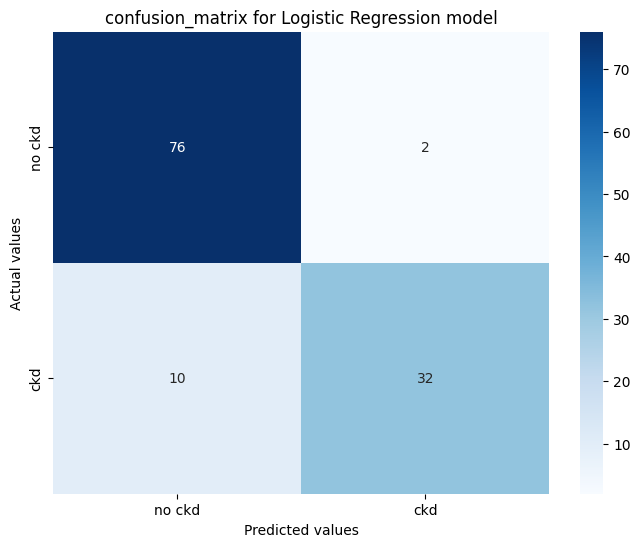

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=
['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion_matrix for Logistic Regression model')
plt.show()


In [ ]:
classification_report(y_test, y_predict)

In [66]:
#Dumping our model in pickle form

pickle.dump(lgr,open('CKD.pkl','wb'))